<a href="https://colab.research.google.com/github/Joygarden425/AI-Project/blob/main/MNIST_Dataload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [3]:
mnist_train=dset.MNIST("", train = True, transform=transforms.ToTensor(),
                       target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 107524966.95it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19588566.27it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33718291.81it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2745428.56it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이: 60000
5
torch.Size([1, 28, 28])


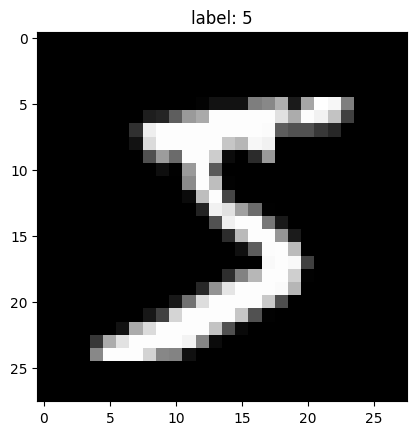

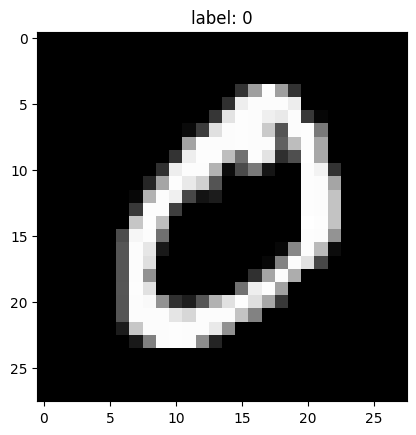

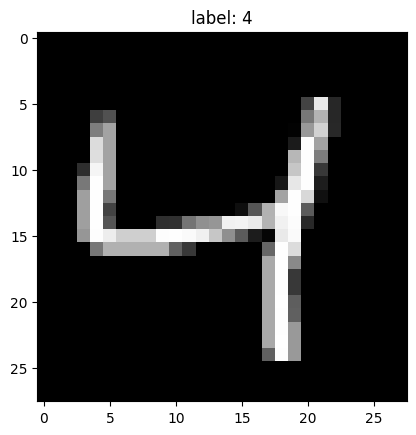

In [4]:
image , label = mnist_train.__getitem__(0)
print(image.size(), label)

image, label = mnist_train[1]
print(image.size(), label)

print(mnist_train.__len__())
print("mnist_train 길이:", len(mnist_train))

print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img = mnist_train[i][0].numpy()
  plt.title("label: %d" %mnist_train[i][1])
  plt.imshow(img[0], cmap='gray')
  plt.show()

In [5]:
mnist_train = dset.MNIST("",train=True,transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("",train=True,transform=transforms.ToTensor(),
                         target_transform=None, download=True)

mnist_train 길이: 60000
mnist_test 길이: 60000
image data 형태: torch.Size([1, 28, 28])
label 5


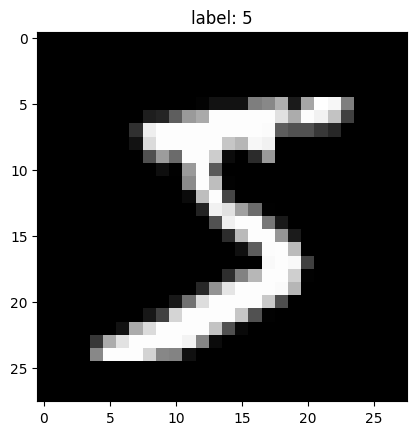

In [6]:
print("mnist_train 길이:",len(mnist_train))
print("mnist_test 길이:",len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태:",image.size())
print("label",label)

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [9]:
batch_size = 16

train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],batch_size=batch_size,
                                           shuffle=True, num_workers=2, drop_last=True)


test_loader = torch.utils.data.DataLoader(list(mnist_test)[:batch_size*100],batch_size=batch_size,
                                           shuffle=False, num_workers=2, drop_last=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[0]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


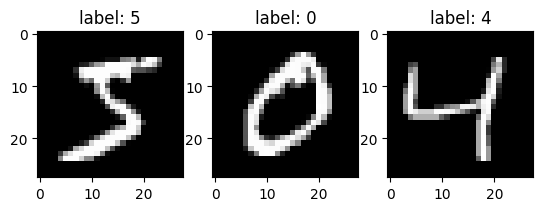

[1]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


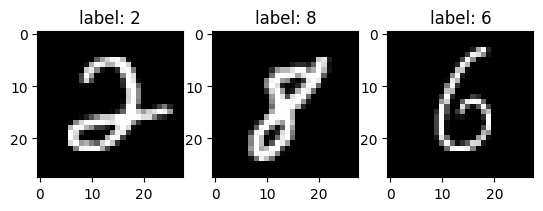

[2]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


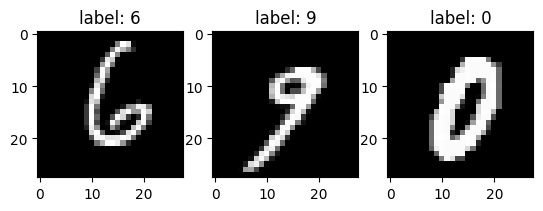

[3]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


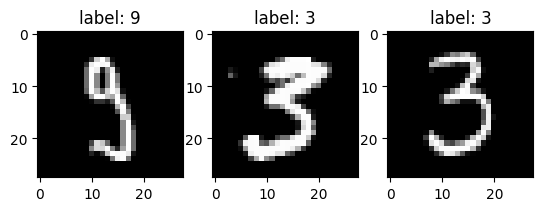

[4]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


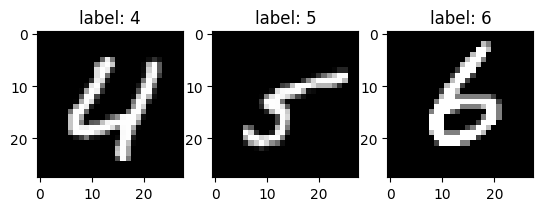

[5]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


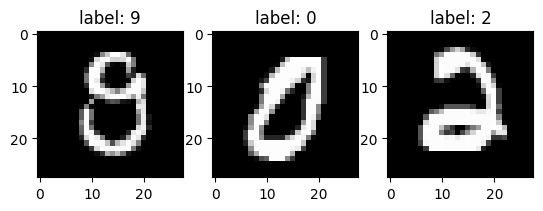

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [11]:
n = 3
for i, [imgs, labels] in enumerate(test_loader):
  if i>5:
    break
  print("[%d]"%i)
  print("한 번에 로드되는 데이터 크기:", len(imgs))

  x = Variable(imgs)
  x = x.reshape((x.shape[0], x.shape[2], x.shape[3]))
  y_ = Variable(labels)

  print(x.shape)
  print(y_.shape)

  for j in range(n):
    img = imgs[j].numpy()
    img = img.reshape((img.shape[1], img.shape[2]))

    plt.subplot(1,n,j+1)
    plt.imshow(img,cmap='gray')
    plt.title("label: %d" %labels[j])

  plt.show()